In [1]:
import numpy as np
import pandas as pd
import matplotlib
import cv2 as cv
import tensorflow as tf
from tensorflow import keras, cast
import matplotlib.pyplot as plt
import math

In [2]:
cnn = tf.keras.models.load_model('bathroom.h5')

In [3]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      8224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 80)       

1/1 [==============================] - 0s 11ms/step


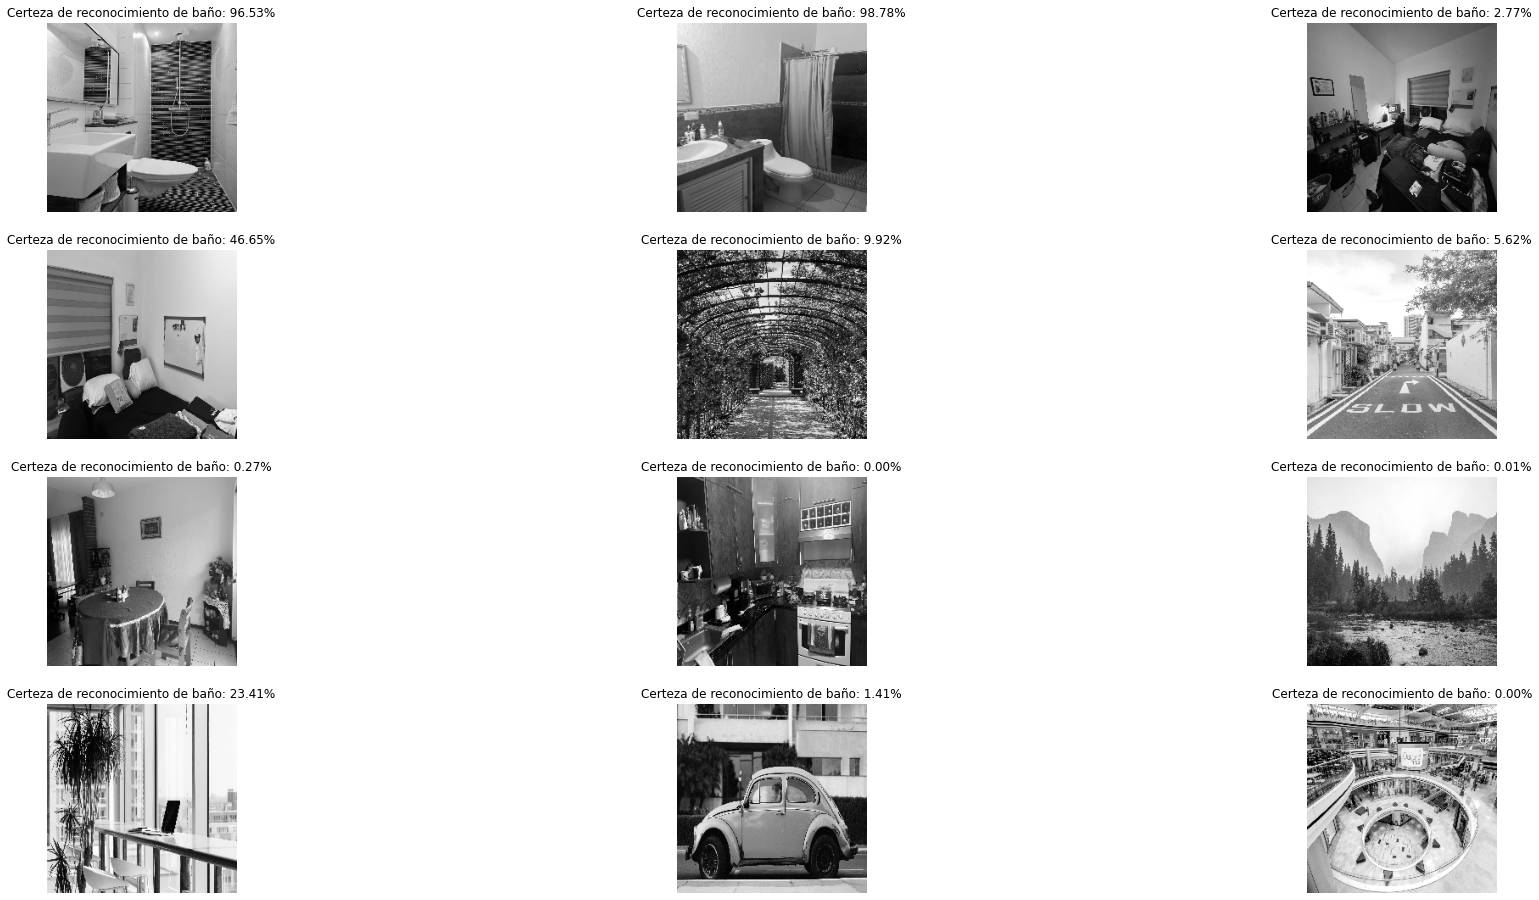

In [15]:
images_array = [
    '../test_real_images/bathroom_google.jpg',
    '../test_real_images/bathroom_real.png',
    '../test_real_images/bedroom_real.jpeg',
    '../test_real_images/bedroom_real_1.jpeg',
    '../test_real_images/garden.jpg',
    '../test_real_images/street.jpg',
    '../test_real_images/dining.png',
    '../test_real_images/kitchen_1.png',
    '../test_real_images/landscape.jpg',
    '../test_real_images/office.jpg',
    '../test_real_images/car.jpg',
    '../test_real_images/mall.png',
]

IMAGE_CHANNEL = 1

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

images_array= [prepare(img) for img in images_array]
plt.figure(figsize=(32, 16))
rows = 4
columns = 3
for i in range(len(images_array)):
  predicted = cnn.predict(images_array[i])
  ax = plt.subplot(rows, columns, i+1)
  plt.imshow(images_array[i].reshape((224,224)).astype('uint8'), cmap='gray')
  plt.title(f"Certeza de reconocimiento de baño: {predicted[0][0]*100:.2f}%")
  plt.axis('off')

plt.show()

In [5]:
for id, element in enumerate(cnn.layers):
    if 'conv' in element.name:
        print(id)

1
3
5


In [6]:
def plot_filters(layer_id: int):
	filters, biases = cnn.layers[layer_id].get_weights()
	print("🚀 ~ file: loaded_model.ipynb ~ line 3 ~ filters", filters.shape)
	f_min, f_max = filters.min(), filters.max()
	filters = (filters - f_min) / (f_max - f_min)
	n_filters, ix = filters.shape[3], 1
	plt.figure(figsize=(16,32))
	for i in range(n_filters):
		f = filters[:, :, 0, i]
		ax = plt.subplot(int(math.ceil(n_filters/3)), 3, ix)
		ax.axis('off')
		plt.imshow(f[:, :], cmap='gray')
		ix += 1
	plt.show()
	return None

🚀 ~ file: loaded_model.ipynb ~ line 3 ~ filters (16, 16, 1, 32)


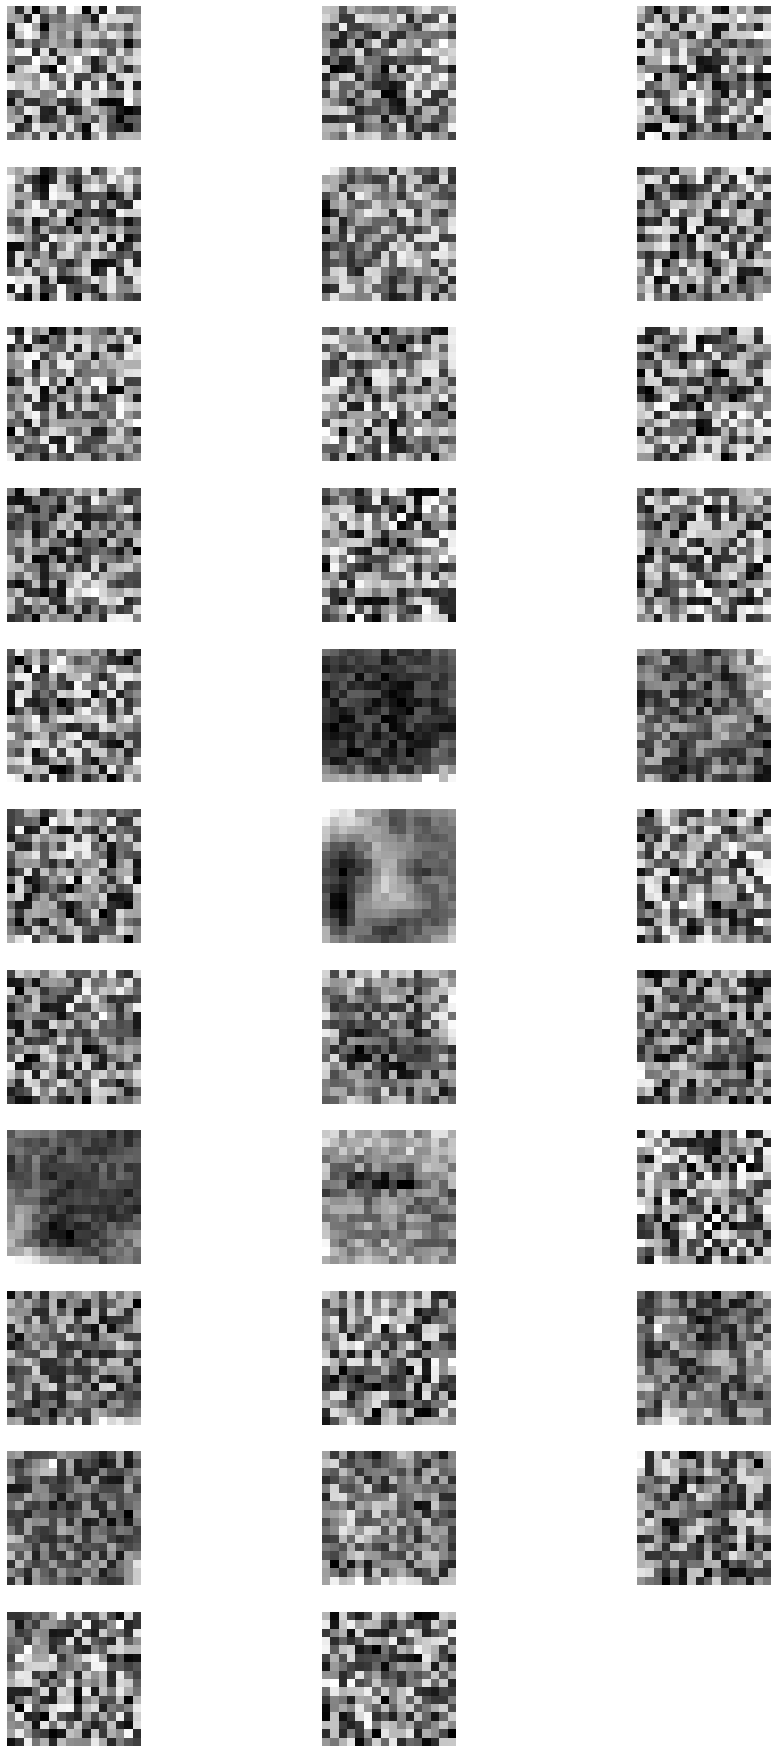

In [7]:
plot_filters(1)

🚀 ~ file: loaded_model.ipynb ~ line 3 ~ filters (9, 9, 32, 64)


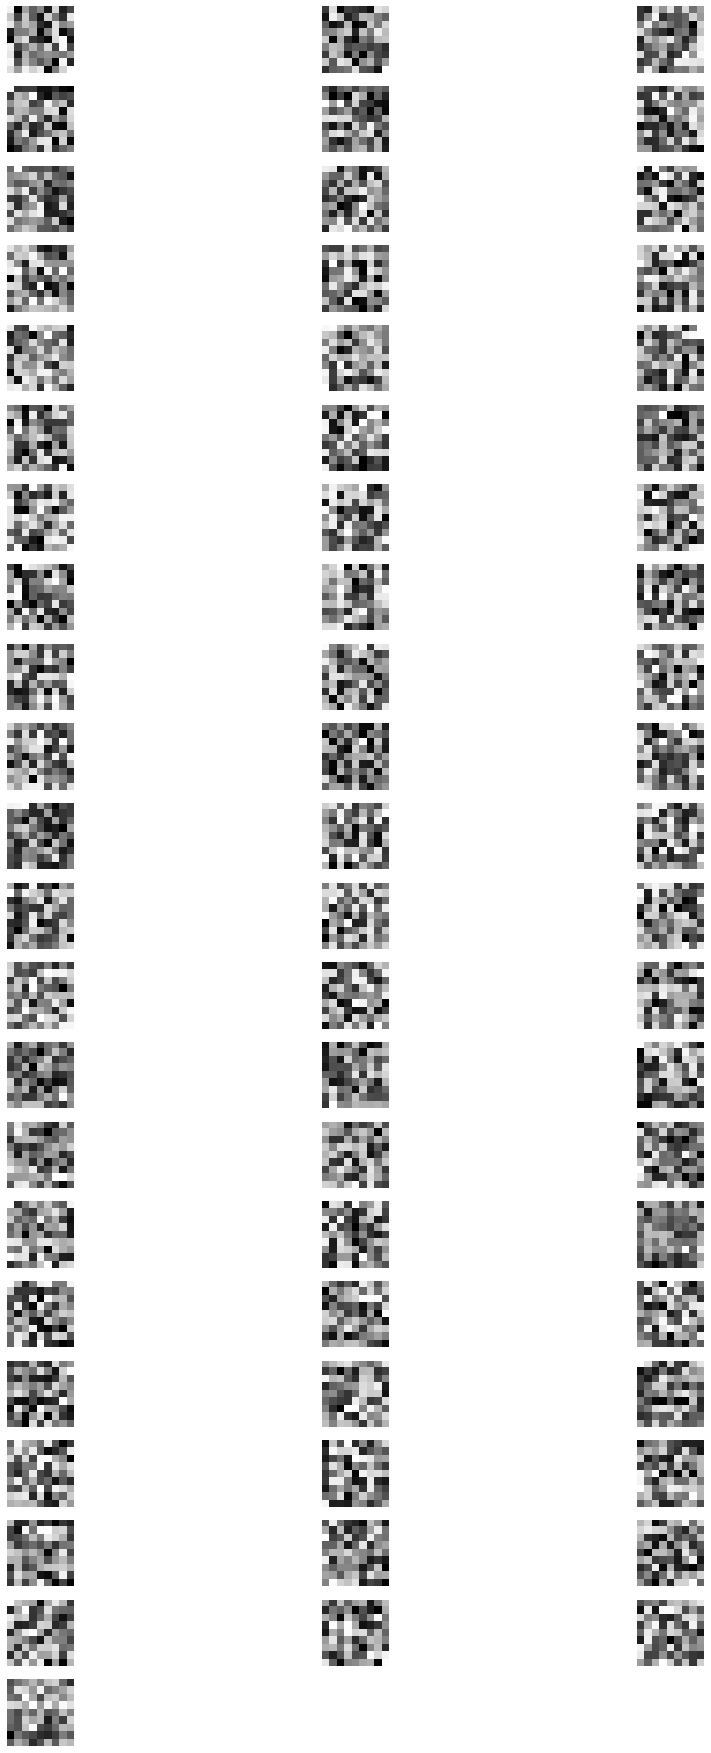

In [8]:
plot_filters(3)

1/1 [==============================] - 0s 13ms/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_input (InputLaye  [(None, 224, 224, 1)]    0         
 r)                                                              
                                                                 
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      8224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        165952    
                                                                 
 max_pool

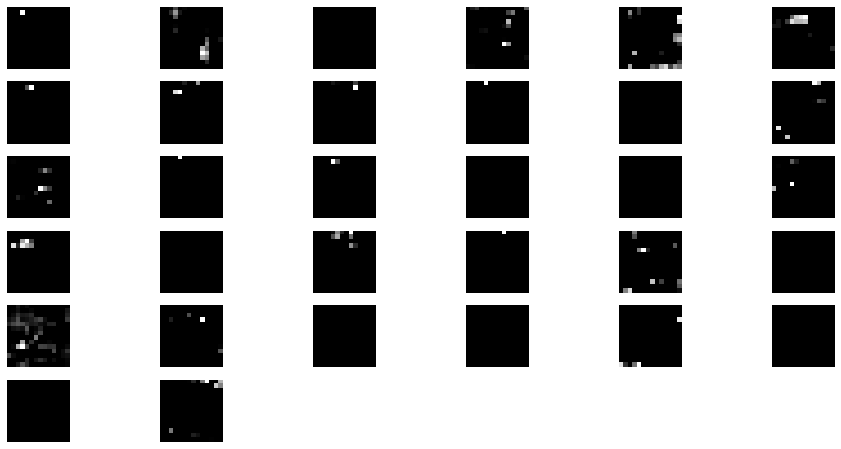

In [9]:
from keras.models import Model
file = '../test_real_images/bathroom.png'

cnn.predict(prepare(file))

# redefine model to output right after the first hidden layer
model = Model(inputs=cnn.inputs, outputs=cnn.layers[5].output)
model.summary()


feature_maps = model.predict(prepare(file))

# filters, biases = model.layers[1].get_weights()	
# filters.shape[2]
square = 6
ix = 1
plt.figure(figsize=(16, 8))
for _ in range(32):
	ax = plt.subplot(square, square, ix)
	ax.axis('off')
	print(np.max(feature_maps[0, :, :, ix-1]))
	plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
	ix += 1
plt.show()

In [10]:
import h5py
import json
filename = 'bathroom.h5'
model_h5 = h5py.File(filename, 'r')

model_config = model_h5["/"].attrs["model_config"]
config_dict = json.loads(model_config)

In [11]:
# print(config_dict["config"]["layers"][i]['class_name']) for i in 
for i in config_dict['config']['layers']:
    if 'Conv' in i['class_name']:
        print(i)

{'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [16, 16], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}
{'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [9, 9], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer':